In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

In [65]:
df = pd.read_csv('hotel_bookings.csv', na_values = ['undefined', '', 'none', '-'])

In [66]:
df.reservation_status_date = pd.to_datetime(df.reservation_status_date)

In [67]:
df.is_canceled = df.is_canceled.replace({0:False, 1:True})

In [68]:
# Change the month's names to numbers
df.arrival_date_month = df.arrival_date_month.map({'January' : 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November': 11, 'December':12})
# Create a column of arrival date, including day, month and year, using lambda.
df.arrival_date = (lambda cols: pd.to_datetime(cols))({'year':df.arrival_date_year, 'month':df.arrival_date_month, 'day':df.arrival_date_day_of_month})

C:\Users\The user\AppData\Local\Temp\ipykernel_26428\318907727.py:4: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [69]:
df.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis=1, inplace=True)

In [70]:
df.direct_booking = df.apply(lambda row: 'yes' if pd.isnull(row['agent']) and pd.isnull(row['company']) else 'no', axis = 1)
df.direct_booking.value_counts()

C:\Users\The user\AppData\Local\Temp\ipykernel_26428\4076480517.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



no     109630
yes      9760
dtype: int64

In [71]:
df.isnull().sum().sort_values(ascending=False).head()

company     112593
agent        16340
country        488
children         4
hotel            0
dtype: int64

In [72]:
avg = round(df.children.mean())
df.children.fillna(avg, inplace=True)

In [73]:
df.country.value_counts(dropna=False)

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 178, dtype: int64

In [74]:
df.country.fillna(method='ffill', inplace=True)

In [75]:
df.country.value_counts(dropna=False)

PRT    48992
GBR    12158
FRA    10418
ESP     8574
DEU     7291
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [76]:
df.agent.fillna(0, inplace=True)
df.company.fillna(0, inplace=True)

In [77]:
df.company.value_counts()

0.0      112593
40.0        927
223.0       784
67.0        267
45.0        250
          ...  
32.0          1
11.0          1
487.0         1
101.0         1
376.0         1
Name: company, Length: 353, dtype: int64

Text(0.5, 0.98, 'Lead time Impacting Cancellations')

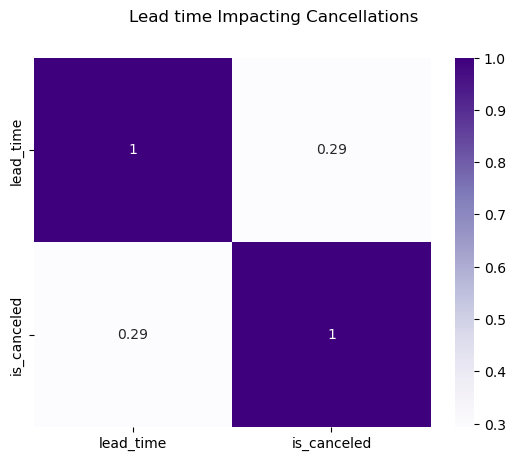

In [78]:
#Find the correlation between lead time and is canceles.
sns.heatmap(data=df[['lead_time','is_canceled']].corr(),annot=True, cmap='Purples')
plt.suptitle("Lead time Impacting Cancellations")

Text(0.5, 1.05, 'Booking Per Month')

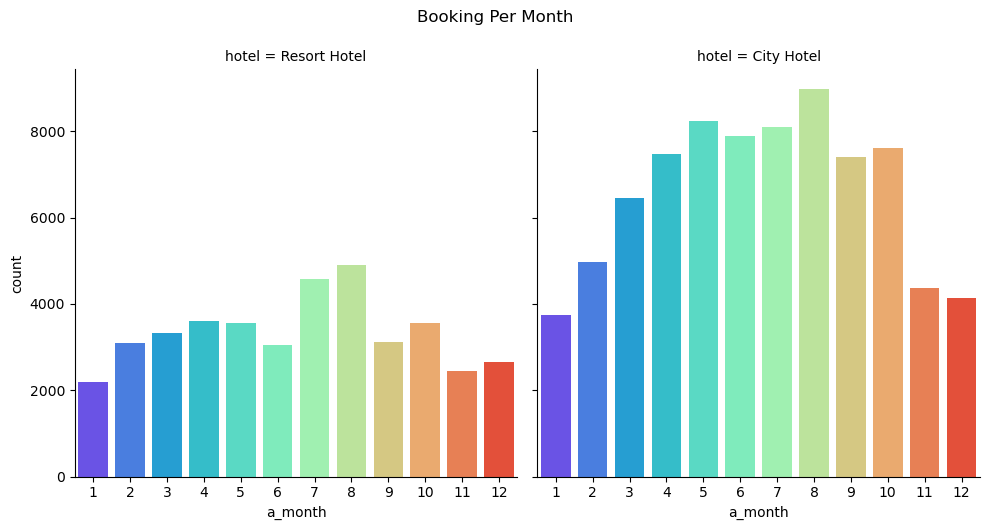

In [79]:
# Create a catplot to find the booking per month for each hotel.
df['a_month'] = df.arrival_date.dt.month
sns.catplot(data = df, x = 'a_month', col= 'hotel', kind= 'count',palette='rainbow')
plt.suptitle("Booking Per Month", y=1.05)

Text(0.5, 1.05, 'Booking Per Year')

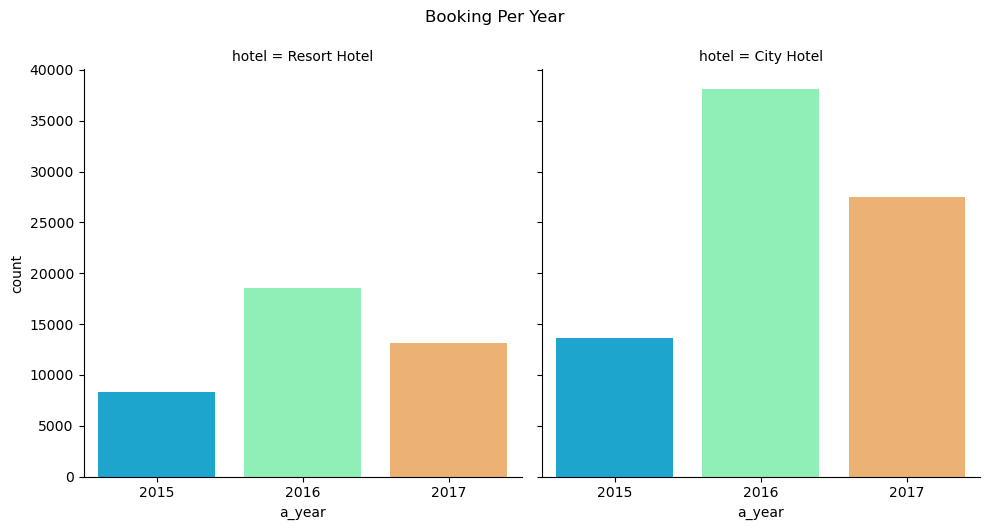

In [80]:
# Create a catplot to find the booking per year for each hotel.
df['a_year'] = df.arrival_date.dt.year
sns.catplot(data = df, x = 'a_year', col='hotel', kind= 'count',palette='rainbow')
plt.suptitle("Booking Per Year",y=1.05)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



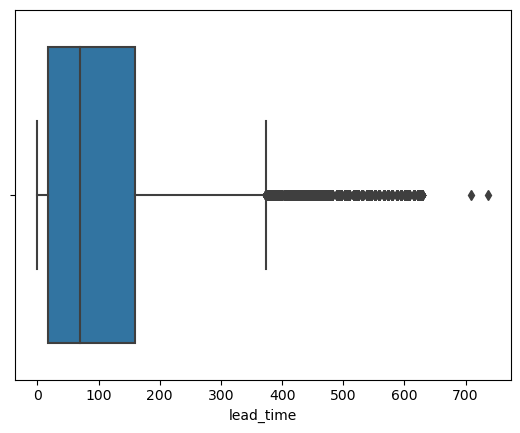

In [81]:
# Create a boxplot to find the 25%, 50%, 75%, and outlier values in the lead time.
sns.boxplot(df.lead_time)
plt.show()

In [82]:
# Create a histogram in plotly in order to find the mode of required car parking spaces.
import plotly.express as px
# df = px.data.tips()
fig = px.histogram(df, x="required_car_parking_spaces")
fig.show()

In [83]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'a_month', 'a_year'],
      dtype='object')